# Identifying fraudualnt bank notes using K-Means-Testing

In [34]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# import csv
url='https://drive.google.com/file/d/1drKZKY8dP5xTqIW3QjrVvq8Aq2Umoe2q/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
print(df)

# create variables
v1 = df['V1']
v2= df['V2']

           V1        V2
0     3.62160   8.66610
1     4.54590   8.16740
2     3.86600  -2.63830
3     3.45660   9.52280
4     0.32924  -4.45520
...       ...       ...
1367  0.40614   1.34920
1368 -1.38870  -4.87730
1369 -3.75030 -13.45860
1370 -3.56370  -8.38270
1371 -2.54190  -0.65804

[1372 rows x 2 columns]


## Data exploration

In [33]:
# Calculate statistical measures for each column
notes_mean = np.mean(df, axis=0)
notes_max = np.max(df, axis=0)
notes_min = np.min(df, axis=0)
notes_std = np.std(df, axis=0)

# Print the statistical measures in a formatted manner
print(f"Mean: {notes_mean}")
print(f"Max: {notes_max}")
print(f"Min: {notes_min}")
print(f"Standard Deviation: {notes_std}")

Mean: V1    0.433735
V2    1.922353
dtype: float64
Max: V1     6.8248
V2    12.9516
dtype: float64
Min: V1    -7.0421
V2   -13.7731
dtype: float64
Standard Deviation: V1    2.841726
V2    5.866907
dtype: float64


## Data visualisation

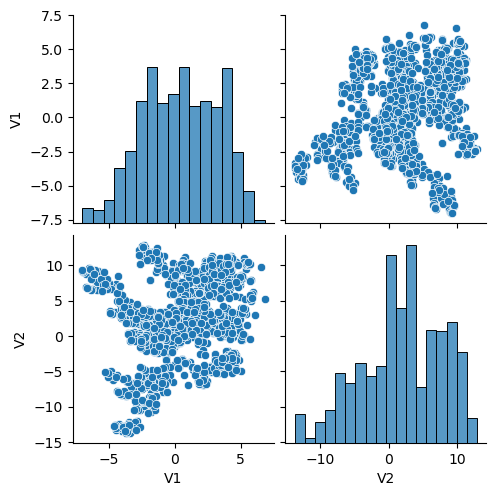

In [30]:
#Create seaborn histograms and scatter plots
import seaborn as sn
sns.pairplot(df)

## Observations from the Plot

### V1  - Histogram
- **Distribution**: Normally distributed.
- **Implication**: Most fake notes share similar characteristics centered around the mean, suggesting a Gaussian-like behavior for fake notes.

### V2  - Histogram
- **Distribution**: Skewed towards the right.
- **Implication**: Most real notes cluster around lower values, but there's a long tail towards the higher end. This skewness could indicate a range of characteristics in real notes, possibly due to different versions or conditions of the notes.

### Scatter Plots
- **Observation**: There are clear clusters all over the scatter plots with no clear pattern otherwise.
- **Implication**: The presence of distinct clusters in the scatter plot indicates that the notes might have underlying features that cause them to group in certain ways.

## Suitability for K-Means Clustering

Given that clear clusters are visible in the scatter plots, K-Means clustering could be a good fit for this data. K-Means is effective when the data naturally forms clusters, and this seems to be the case here. However, the lack of an overall pattern suggests that the algorithm might capture local structures rather than any global pattern.



## K-Means testing

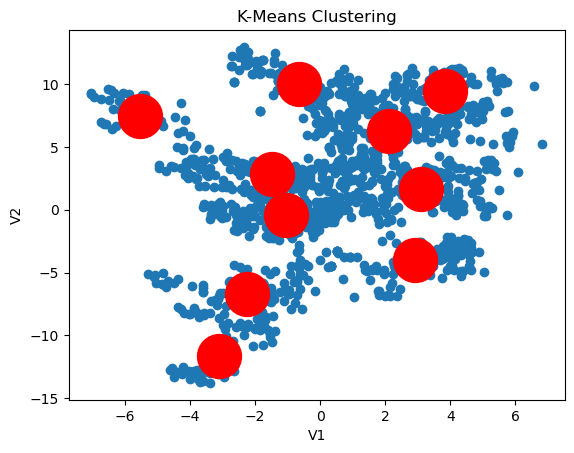

In [94]:
# Fit the K-Means algorithm to the data
# n_clusters specifies the number of clusters
# n_init specifies the number of times the algorithm will be run with different initial centroids
km_notes = KMeans(n_clusters=10, n_init=10).fit(df)

# Get the coordinates of the cluster centers
clusters = km_notes.cluster_centers_

# Create a scatter plot to visualize the data points (assuming v1 and v2 are your features)
# The color for each point depends on its label assigned by K-Means
plt.scatter(df['V1'], df['V2'], label='Data Points')

# Plot the cluster centers
# 's' is the size of the markers (the cluster centers in this case)
plt.scatter(clusters[:, 0], clusters[:, 1], s=1000, c='red', label='Cluster Centers')

# Add titles and labels
plt.title('K-Means Clustering')
plt.xlabel('V1')
plt.ylabel('V2')

# Display the plot
plt.show()


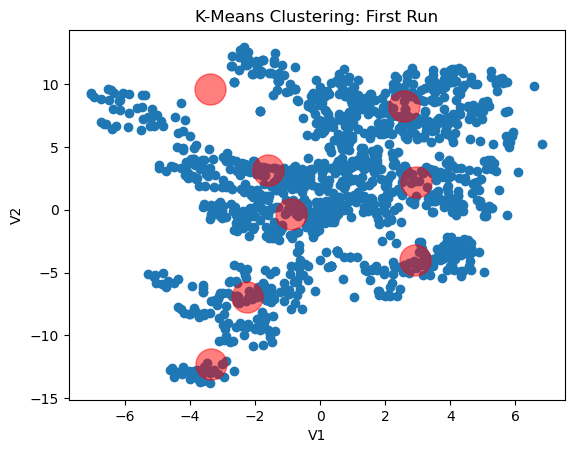

Cluster centers from the first run:
[[  2.95041787   2.24257213]
 [ -2.25752565  -6.91319116]
 [  2.57176682   8.22339121]
 [  2.92142083  -3.99647541]
 [ -1.5910265    3.13885181]
 [ -0.89502241  -0.34882645]
 [ -3.34382195 -12.23202195]
 [ -3.37866153   9.63806633]]


In [118]:
# Import necessary libraries if not already imported
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fit the K-Means algorithm to the data for the first run
# n_clusters specifies the number of clusters
# n_init specifies the number of times the algorithm will be run with different initial centroids
km_notes = KMeans(n_clusters=8, n_init=10).fit(df)

# Get the coordinates of the cluster centers from the first run
clusters = km_notes.cluster_centers_

# Create a scatter plot to visualize the data points (assuming v1 and v2 are your features)
# The color for each point depends on its label assigned by K-Means
plt.scatter(df['V1'], df['V2'], label='Data Points')

# Plot the cluster centers from the first run
# 's' is the size of the markers (the cluster centers in this case)
plt.scatter(clusters[:, 0], clusters[:, 1], s=500, c='red', label='Cluster Centers', alpha=0.50)
# Add titles and labels
plt.title('K-Means Clustering: First Run')
plt.xlabel('V1')
plt.ylabel('V2')
plt.savefig("fig1")

# Display the plot
plt.show()

# Print the cluster centers for reference
print("Cluster centers from the first run:")
print(clusters)

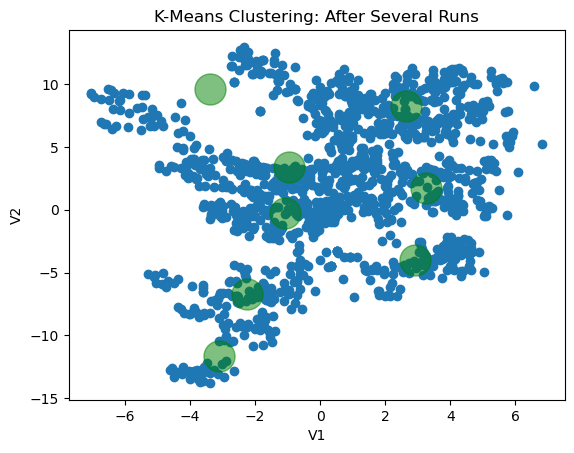

Cluster centers after several runs:
[[ -0.9664289    3.39018571]
 [  2.64900633   8.24496135]
 [ -2.26086963  -6.71053088]
 [  2.92471947  -4.01921136]
 [  3.25093081   1.71237906]
 [ -1.08377338  -0.24828363]
 [ -3.38487101   9.59963434]
 [ -3.10528269 -11.63691923]]


In [117]:
# Fit the K-Means algorithm to the data after several runs
# n_clusters specifies the number of clusters
# n_init specifies the number of times the algorithm will be run with different initial centroids
km_notes = KMeans(n_clusters=8, n_init=10).fit(df)

# Get the coordinates of the cluster centers after several runs
clusters = km_notes.cluster_centers_

# Create a scatter plot to visualize the data points (assuming v1 and v2 are your features)
# The color for each point depends on its label assigned by K-Means
plt.scatter(df['V1'], df['V2'], label='Data Points')

# Plot the cluster centers after several runs
# 's' is the size of the markers (the cluster centers in this case)
plt.scatter(clusters[:, 0], clusters[:, 1], s=500, c='green', label='Cluster Centers',alpha=0.50)

# Add titles and labels
plt.title('K-Means Clustering: After Several Runs')
plt.xlabel('V1')
plt.ylabel('V2')
plt.savefig("fig2")

# Display the plot
plt.show()

# Print the cluster centers for reference
print("Cluster centers after several runs:")
print(clusters)


## Observations on Stability
Upon comparing the initial and final centroids, it's clear that the algorithm shows some variation but also a degree of stability. Specifically, the centroids for the clusters do not drastically change between the runs. This suggests that while the K-means algorithm isn't perfectly stable for this dataset, it is relatively stable, and the clusters are reasonably robust.

# Conclusion
Overall, the K-means clustering algorithm appears to be relatively stable for this dataset. The centroids don't change dramatically across different runs, suggesting that the algorithm is finding a consistent structure in the data.